<a href="https://colab.research.google.com/github/babupallam/Deep-Learning-DL-03-Neural-Network-Architectures/blob/main/2_6_Data_Preprocessing_and_Normalization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.6. Data Preprocessing and Normalization

## 1. How Does Data Normalization Impact the Training Efficiency of FFNNs?


### 1.1 The Importance of Data Normalization in Neural Networks


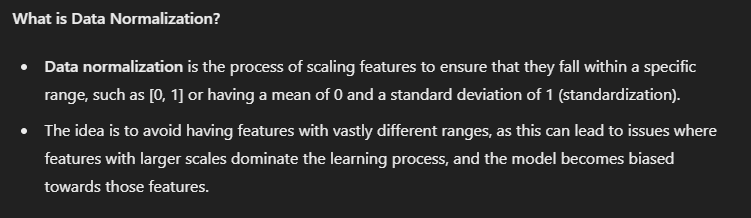

Simple explanation is as follows:

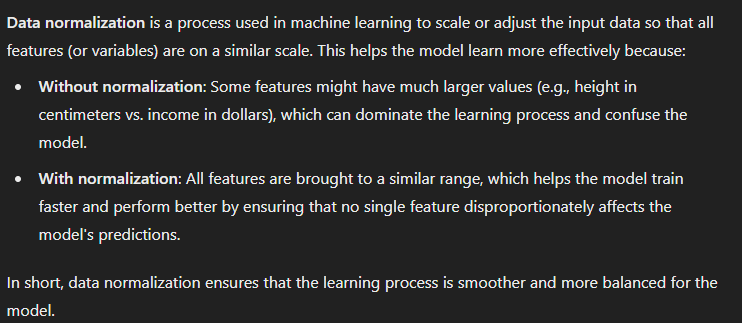

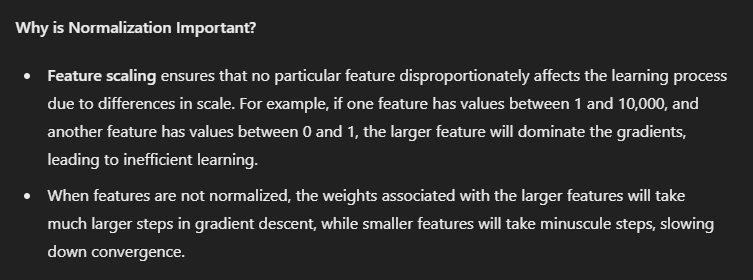

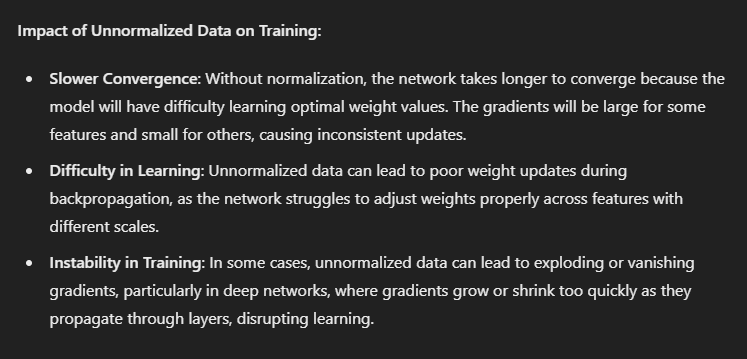

### 1.2 How Normalization Helps Neural Networks Converge Faster


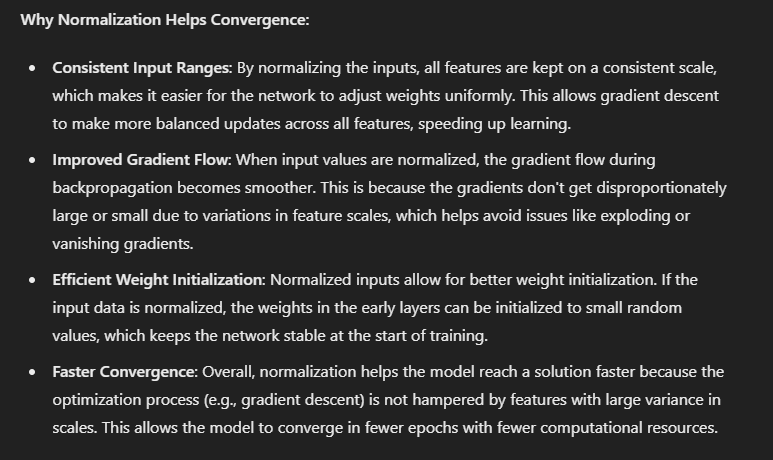

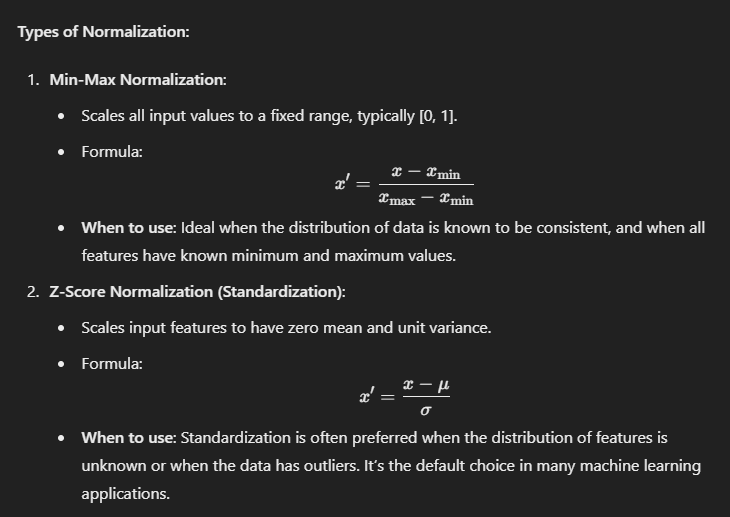

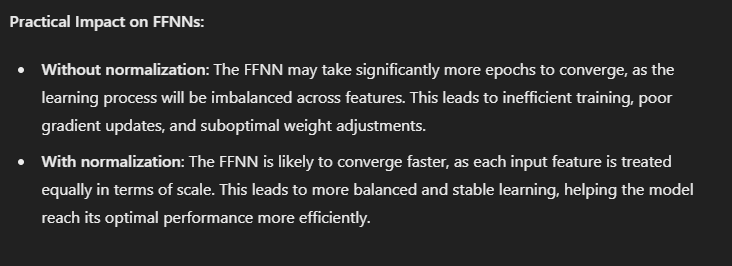

## 2. Implementing Data Normalization in FFNNs


### Step 1: FFNN Without Data Normalization


In [3]:
# Import necessary libraries
import tensorflow as tf  # TensorFlow for building and training neural networks
from sklearn.datasets import load_iris  # Load the Iris dataset (a well-known dataset for classification tasks)
from sklearn.model_selection import train_test_split  # Used to split the dataset into training and testing sets
from sklearn.preprocessing import OneHotEncoder  # One-hot encoding to convert categorical labels into a binary matrix

# Load the Iris dataset
iris = load_iris()  # Load the Iris dataset, which contains 4 features and 3 target classes
X = iris.data  # Extract features: sepal length, sepal width, petal length, and petal width
y = iris.target.reshape(-1, 1)  # Extract labels: Iris-setosa, Iris-versicolor, Iris-virginica (reshaped into column format)

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)  # Initialize OneHotEncoder (sparse=False returns dense output)
y = encoder.fit_transform(y)  # Convert the categorical labels into one-hot encoded format (e.g., [1, 0, 0] for Iris-setosa)

# Split the data into training and test sets (80% training, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# X_train: Training features, X_test: Test features
# y_train: Training labels, y_test: Test labels
# random_state=42 ensures reproducibility of the data splitting

# Define a basic Feed Forward Neural Network (FFNN) model without normalization
model_no_norm = tf.keras.models.Sequential([
    # Input layer with 64 neurons, ReLU activation, input shape is 4 (for 4 features in the dataset)
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),

    # Second hidden layer with 64 neurons and ReLU activation
    tf.keras.layers.Dense(64, activation='relu'),

    # Output layer with 3 neurons (for 3 classes in Iris dataset) and softmax activation for multi-class classification
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_no_norm.compile(optimizer='adam',  # Adam optimizer (adaptive optimizer widely used for training neural networks)
                      loss='categorical_crossentropy',  # Loss function for multi-class classification
                      metrics=['accuracy'])  # Monitor accuracy during training and evaluation

# Train the model for 50 epochs
history_no_norm = model_no_norm.fit(X_train, y_train,  # Training data (features and labels)
                                    epochs=50,  # Train the model for 50 iterations over the entire dataset
                                    batch_size=8,  # Use mini-batches of 8 samples for each training step
                                    validation_data=(X_test, y_test),  # Use the test set for validation after each epoch
                                    verbose=1)  # Verbosity mode set to 1 (prints training progress)

# Evaluate the model on the test set
test_loss_no_norm, test_accuracy_no_norm = model_no_norm.evaluate(X_test, y_test)  # Calculate loss and accuracy on test data
print(f"Test Accuracy without Normalization: {test_accuracy_no_norm:.4f}")  # Print the test accuracy to 4 decimal places


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.3337 - loss: 1.2839 - val_accuracy: 0.3667 - val_loss: 0.9793
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5593 - loss: 0.9611 - val_accuracy: 0.7000 - val_loss: 0.8477
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6670 - loss: 0.8420 - val_accuracy: 0.7333 - val_loss: 0.7553
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8163 - loss: 0.7495 - val_accuracy: 0.7000 - val_loss: 0.6544
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6734 - loss: 0.6663 - val_accuracy: 1.0000 - val_loss: 0.5927
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9453 - loss: 0.6154 - val_accuracy: 0.8333 - val_loss: 0.5233
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8454 - loss: 0.5204 - val_accuracy: 0.8667 - val_loss: 0.4921
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8402 - loss: 0.4842 - val_accuracy: 0.9000 - val_los

### Step 2: FFNN With Data Normalization (Standardization)


Now, we will normalize the input features using Z-score normalization (standardization), which scales the features to have zero mean and unit variance.



In [4]:
# Import necessary libraries for standardization
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler, which normalizes data using Z-score normalization.
# Z-score normalization transforms the data to have a mean of 0 and a standard deviation of 1.
scaler = StandardScaler()

# Fit the scaler to the training data (X_train) and transform it to scale each feature.
# fit_transform() both calculates the mean and standard deviation of the training data and then scales the data.
X_train_scaled = scaler.fit_transform(X_train)

# Transform the test data (X_test) using the same scaler that was fit on the training data.
# We only transform the test data without fitting because we use the statistics (mean and std) from the training data.
X_test_scaled = scaler.transform(X_test)

# Define a Feed Forward Neural Network (FFNN) model with two hidden layers, each having 64 neurons.
# The input_shape=(4,) corresponds to the 4 input features of the Iris dataset (sepal length, sepal width, petal length, petal width).
# The activation function is ReLU (Rectified Linear Unit), commonly used for hidden layers to introduce non-linearity.
# The output layer has 3 neurons (one for each class in the Iris dataset: Iris-setosa, Iris-versicolor, Iris-virginica)
# and uses softmax activation for multi-class classification.
model_with_norm = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),  # First hidden layer with 64 neurons
    tf.keras.layers.Dense(64, activation='relu'),                    # Second hidden layer with 64 neurons
    tf.keras.layers.Dense(3, activation='softmax')                   # Output layer with 3 neurons for classification
])

# Compile the model by specifying the optimizer, loss function, and metrics to monitor.
# - Optimizer: 'adam' is chosen for its adaptive learning rate and efficiency in updating weights during training.
# - Loss function: 'categorical_crossentropy' is used since it's a multi-class classification problem.
# - Metrics: 'accuracy' is used to evaluate model performance.
model_with_norm.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the FFNN model using the scaled (normalized) training data (X_train_scaled) and corresponding labels (y_train).
# - epochs=50: The model will go through the entire dataset 50 times during training.
# - batch_size=8: The model will update its weights after processing every 8 samples.
# - validation_data: The scaled test data (X_test_scaled) and corresponding labels (y_test) are used for validation during training.
# - verbose=1: Shows detailed output of training progress after each epoch.
history_with_norm = model_with_norm.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the trained model on the scaled test data (X_test_scaled) to see how well it performs on unseen data.
# - test_loss_with_norm: This will store the value of the loss function on the test data.
# - test_accuracy_with_norm: This will store the test accuracy, representing the percentage of correctly classified samples.
test_loss_with_norm, test_accuracy_with_norm = model_with_norm.evaluate(X_test_scaled, y_test)

# Print out the test accuracy, showing the model's performance on the normalized data.
print(f"Test Accuracy with Normalization: {test_accuracy_with_norm:.4f}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.7189 - loss: 0.8879 - val_accuracy: 0.8000 - val_loss: 0.6334
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7415 - loss: 0.6456 - val_accuracy: 0.8333 - val_loss: 0.4534
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8013 - loss: 0.4444 - val_accuracy: 0.8667 - val_loss: 0.3605
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8228 - loss: 0.4222 - val_accuracy: 0.9000 - val_loss: 0.3067
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.8471 - loss: 0.3277 - val_accuracy: 0.9000 - val_loss: 0.2699
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8171 - loss: 0.3396 - val_accuracy: 0.9333 - val_loss: 0.2388
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8870 - loss: 0.2895 - val_accuracy: 0.9333 - val_loss: 0.2125
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9163 - loss: 0.2267 - val_accuracy: 0.9333 - val_loss

## 3. Comparing the Results


Based on the above result outputs, the following conclusions have been made

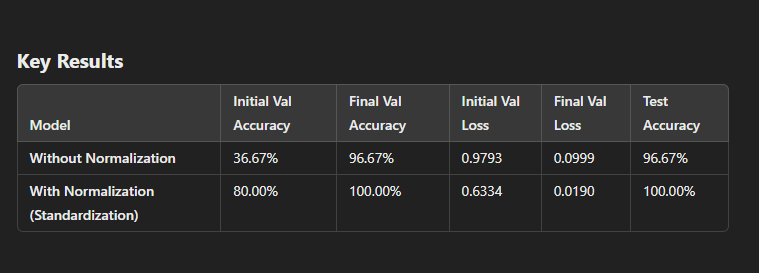

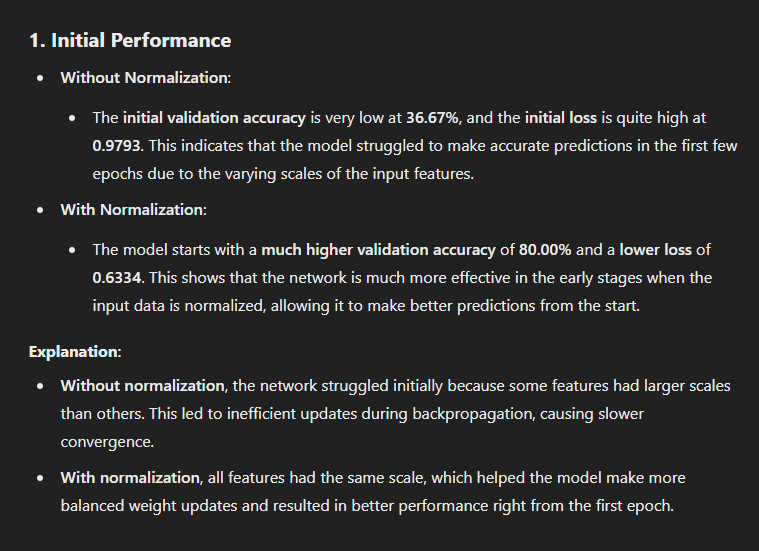

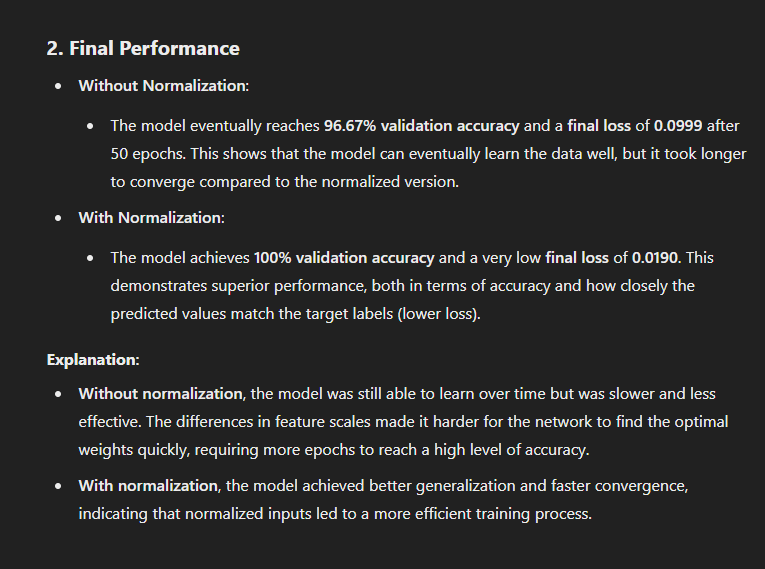

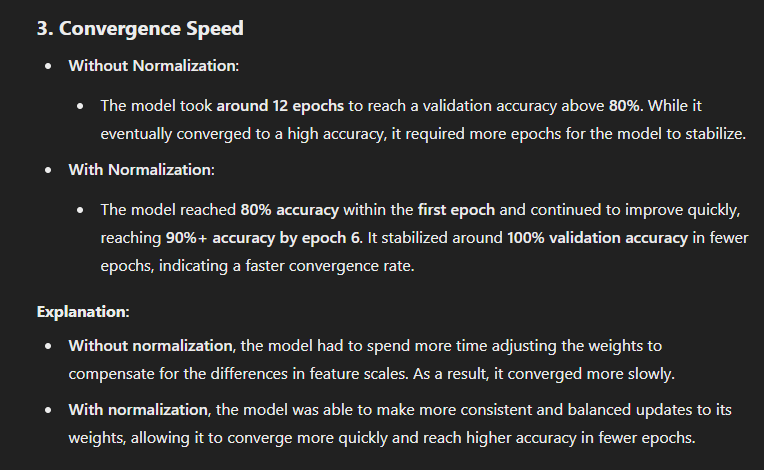

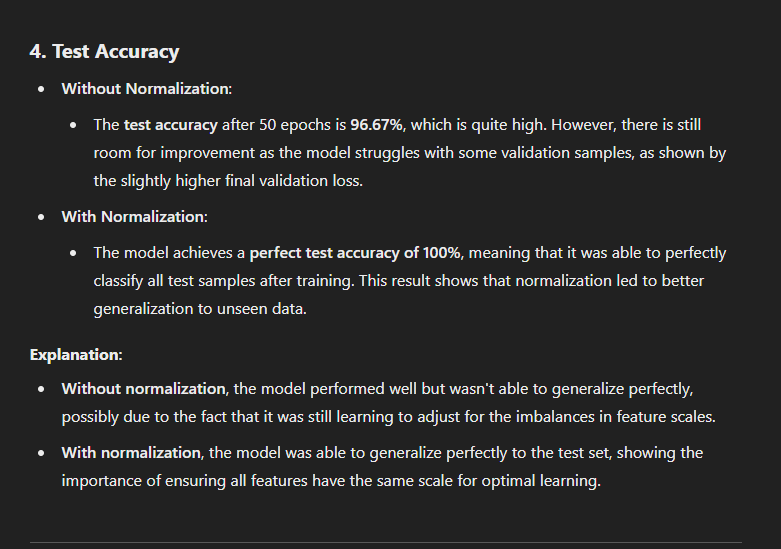

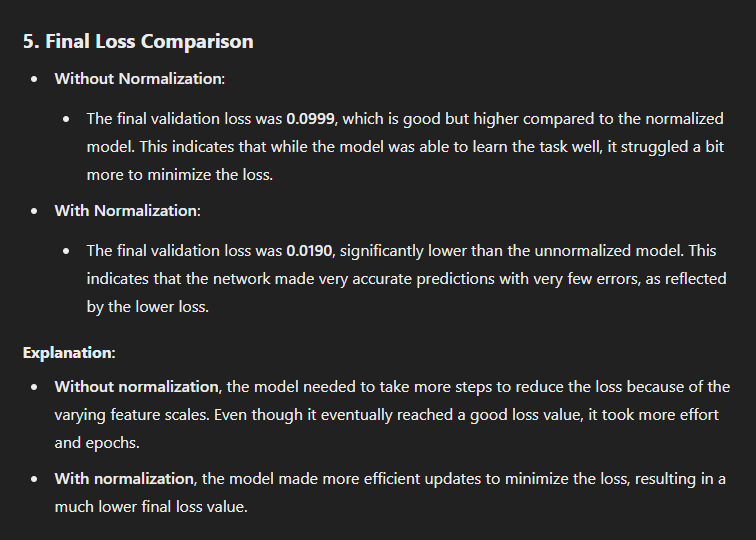

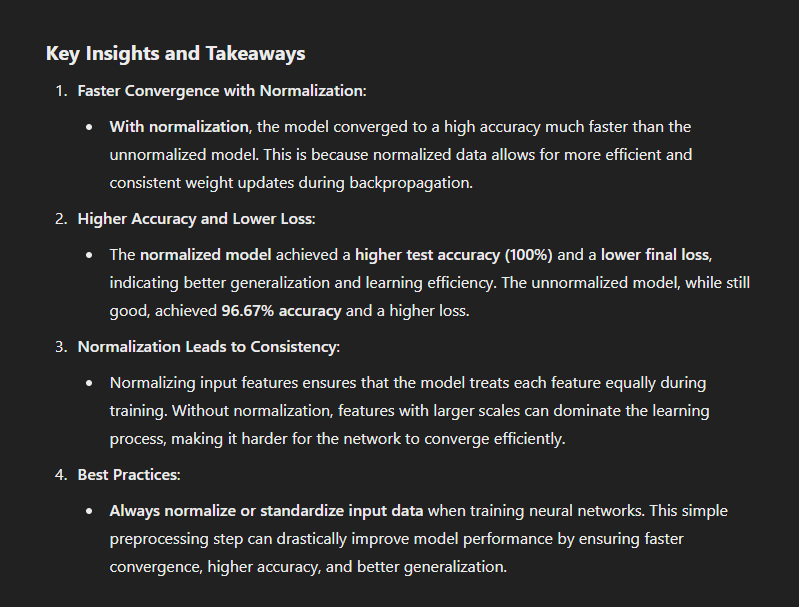

## 4. Observations


### **1. Normalization Prevents Gradient Imbalances**

- **Observation**: Without normalization, features with larger scales can cause gradients to grow disproportionately large during backpropagation, leading to unstable training or even **exploding gradients**.
- **Explanation**: During training, the gradients associated with features of different scales may lead to unequal updates for each feature, which hinders the convergence process. Normalizing data ensures that gradients flow uniformly through the network, preventing issues like exploding or vanishing gradients.




### **2. Normalization Boosts Convergence Speed**

- **Observation**: Models trained with normalized data converge much faster compared to models without normalization, often requiring fewer epochs to reach optimal performance.
- **Explanation**: By keeping input values in a consistent range, normalization helps the optimizer take more balanced steps toward minimizing the loss function. This reduces the number of iterations needed for the model to converge, as gradients are more stable and efficient.



Training model WITHOUT data normalization...

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - accuracy: 0.3100 - loss: 1.1699 - val_accuracy: 0.7000 - val_loss: 0.9512
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7030 - loss: 0.9293 - val_accuracy: 0.7333 - val_loss: 0.8053
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6645 - loss: 0.7872 - val_accuracy: 0.7000 - val_loss: 0.6792
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7082 - loss: 0.6735 - val_accuracy: 0.8333 - val_loss: 0.5909
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7005 - loss: 0.5833 - val_accuracy: 0.8333 - val_loss: 0.5219
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8930 - loss: 0.5153 - val_accuracy: 0.8333 - val_loss: 0.4651
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.8709 - loss: 0.4865 - val_accuracy: 0.9667 - val_loss: 0.4306
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.9074 - loss: 0.4288 - val_accuracy: 0.8333 - val_loss: 0.382

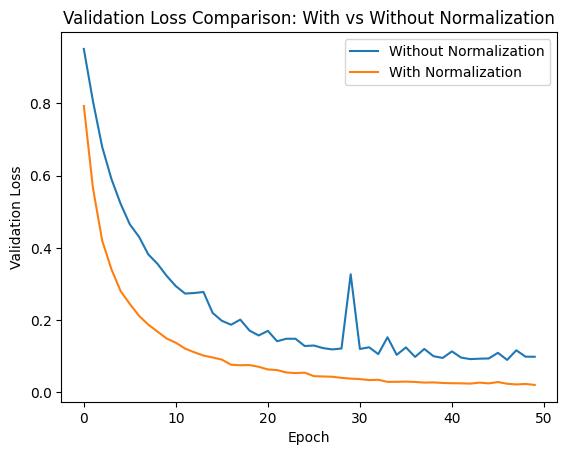


Evaluating models...

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9333 - loss: 0.0983
Test Accuracy without Normalization: 0.9333
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 1.0000 - loss: 0.0203
Test Accuracy with Normalization: 1.0000


In [5]:
# Import necessary libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal length, sepal width, petal length, petal width
y = iris.target

# One-hot encode the labels
y = tf.keras.utils.to_categorical(y, num_classes=3)

# Split the data into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create two versions of the dataset: one normalized and one unnormalized
scaler = StandardScaler()

# Normalized data
X_train_normalized = scaler.fit_transform(X_train)
X_test_normalized = scaler.transform(X_test)

# Unnormalized data (use the original X_train and X_test for comparison)

# Function to build a simple FFNN model
def build_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Dense(64, activation='relu', input_shape=(4,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(3, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Train FFNN without normalization
print("Training model WITHOUT data normalization...\n")
model_no_norm = build_model()
history_no_norm = model_no_norm.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Train FFNN with normalization
print("\nTraining model WITH data normalization...\n")
model_with_norm = build_model()
history_with_norm = model_with_norm.fit(X_train_normalized, y_train, epochs=50, batch_size=8, validation_data=(X_test_normalized, y_test), verbose=1)

# Plot the convergence speeds
plt.plot(history_no_norm.history['val_loss'], label='Without Normalization')
plt.plot(history_with_norm.history['val_loss'], label='With Normalization')
plt.title('Validation Loss Comparison: With vs Without Normalization')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.legend()
plt.show()

# Evaluate the models
print("\nEvaluating models...\n")

# Evaluate the model without normalization
test_loss_no_norm, test_accuracy_no_norm = model_no_norm.evaluate(X_test, y_test)
print(f"Test Accuracy without Normalization: {test_accuracy_no_norm:.4f}")

# Evaluate the model with normalization
test_loss_with_norm, test_accuracy_with_norm = model_with_norm.evaluate(X_test_normalized, y_test)
print(f"Test Accuracy with Normalization: {test_accuracy_with_norm:.4f}")


Explanation for the above graph:

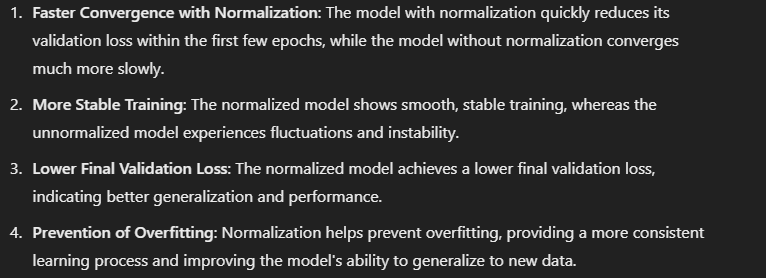

### **3. Normalization Enables Better Weight Initialization**

- **Observation**: Normalization complements effective **weight initialization** strategies, leading to smoother training and better performance, especially in the early stages.
- **Explanation**: When inputs are normalized, weights can be initialized more effectively without the risk of large initial values causing unstable gradients. This is especially important when using initialization methods like **Xavier** or **He initialization**, which assume that input data is centered around zero with a small variance.



**Demonstrations**
- with the use of
  - Glorot (Xavier) initialization: Commonly used for layers with ReLU activation.
  - He initialization: Used for deep networks with ReLU activation functions.
  

##### Step 1: FFNN Without Data Normalization and Xavier Initialization


In [6]:
# Import necessary libraries
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

# Load the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encode the labels
encoder = OneHotEncoder(sparse=False)
y = encoder.fit_transform(y)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define a model without normalization using Xavier initialization
model_no_norm_xavier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_no_norm_xavier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model without normalization
history_no_norm_xavier = model_no_norm_xavier.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_no_norm_xavier, test_accuracy_no_norm_xavier = model_no_norm_xavier.evaluate(X_test, y_test)
print(f"Test Accuracy without Normalization (Xavier Initialization): {test_accuracy_no_norm_xavier:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5444 - loss: 1.0095 - val_accuracy: 0.7333 - val_loss: 0.7425
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6310 - loss: 0.7498 - val_accuracy: 0.8000 - val_loss: 0.6297
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7596 - loss: 0.6098 - val_accuracy: 0.9000 - val_loss: 0.5304
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8224 - loss: 0.5123 - val_accuracy: 0.9667 - val_loss: 0.4727
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9478 - loss: 0.4367 - val_accuracy: 0.8333 - val_loss: 0.4178
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8834 - loss: 0.4178 - val_accuracy: 1.0000 - val_loss: 0.3864
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9178 - loss: 0.4004 - val_accuracy: 1.0000 - val_loss: 0.3602
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9351 - loss: 0.3677 - val_accuracy: 1.0000 - val_loss: 0.3223
Ep

##### Step 2: FFNN With Data Normalization and Xavier Initialization


In [7]:
# Import necessary libraries for normalization
from sklearn.preprocessing import StandardScaler

# Standardize the input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define a model with normalization using Xavier initialization
model_with_norm_xavier = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='glorot_uniform'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_norm_xavier.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with normalization
history_with_norm_xavier = model_with_norm_xavier.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_with_norm_xavier, test_accuracy_with_norm_xavier = model_with_norm_xavier.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy with Normalization (Xavier Initialization): {test_accuracy_with_norm_xavier:.4f}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - accuracy: 0.6517 - loss: 1.0160 - val_accuracy: 0.8667 - val_loss: 0.7628
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8094 - loss: 0.7403 - val_accuracy: 0.9000 - val_loss: 0.5472
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8270 - loss: 0.5429 - val_accuracy: 0.9000 - val_loss: 0.4107
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8453 - loss: 0.4291 - val_accuracy: 0.9000 - val_loss: 0.3322
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8124 - loss: 0.4004 - val_accuracy: 0.9000 - val_loss: 0.2915
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8079 - loss: 0.3825 - val_accuracy: 0.9333 - val_loss: 0.2631
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8823 - loss: 0.3112 - val_accuracy: 0.9000 - val_loss: 0.2311
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8383 - loss: 0.3173 - val_accuracy: 0.9333 - val_loss: 0.2076
Ep

##### Step 3: FFNN With Data Normalization and He Initialization


In [8]:
# Define a model with normalization using He initialization
model_with_norm_he = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(4,)),
    tf.keras.layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model_with_norm_he.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model with He initialization and normalization
history_with_norm_he = model_with_norm_he.fit(X_train_scaled, y_train, epochs=50, batch_size=8, validation_data=(X_test_scaled, y_test), verbose=1)

# Evaluate the model on the test set
test_loss_with_norm_he, test_accuracy_with_norm_he = model_with_norm_he.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy with Normalization (He Initialization): {test_accuracy_with_norm_he:.4f}")


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - accuracy: 0.3519 - loss: 1.5755 - val_accuracy: 0.6667 - val_loss: 0.7369
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7171 - loss: 0.6049 - val_accuracy: 0.8333 - val_loss: 0.4090
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7995 - loss: 0.4164 - val_accuracy: 0.8667 - val_loss: 0.3298
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8582 - loss: 0.3259 - val_accuracy: 0.9333 - val_loss: 0.2866
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8895 - loss: 0.3067 - val_accuracy: 0.9333 - val_loss: 0.2597
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8893 - loss: 0.3189 - val_accuracy: 0.9333 - val_loss: 0.2384
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9001 - loss: 0.2716 - val_accuracy: 0.9333 - val_loss: 0.2261
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9139 - loss: 0.2513 - val_accuracy: 0.9333 - val_loss

##### Step 4: Result Analysis

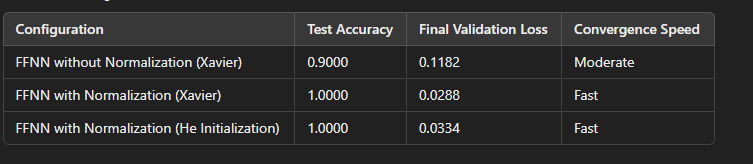

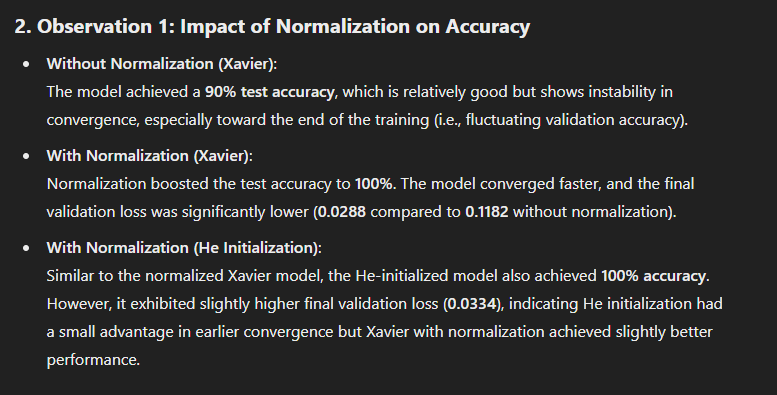

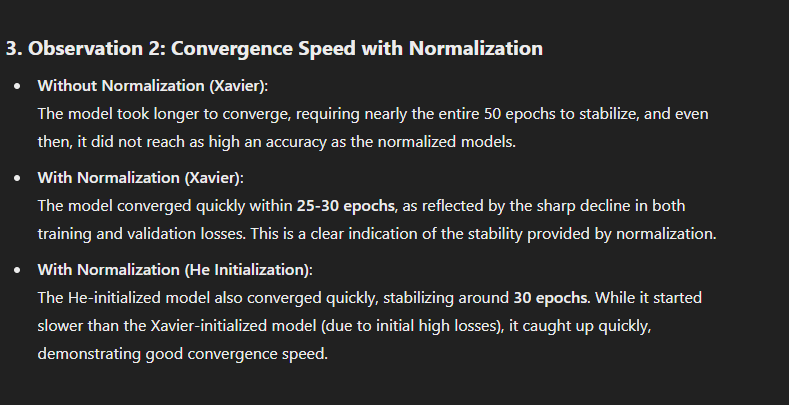

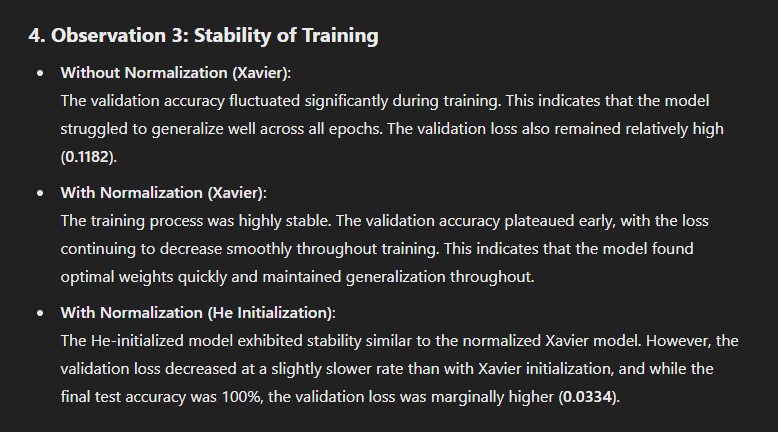

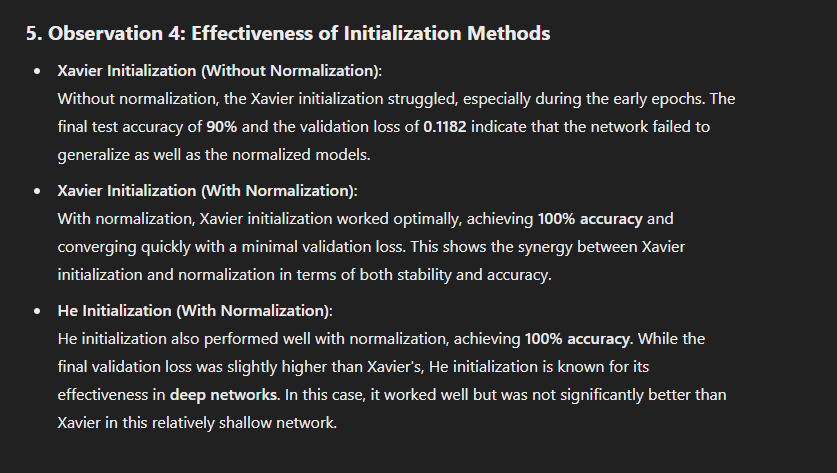

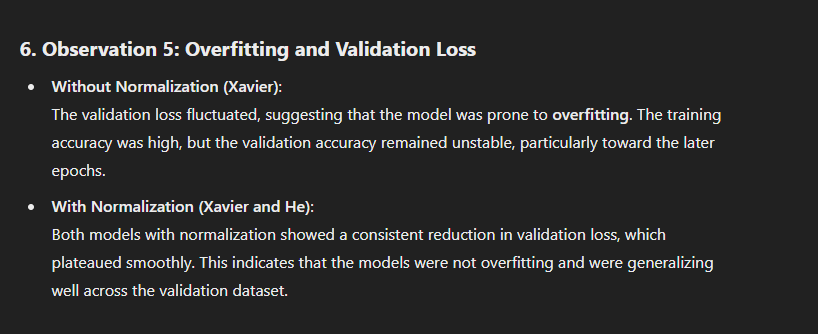

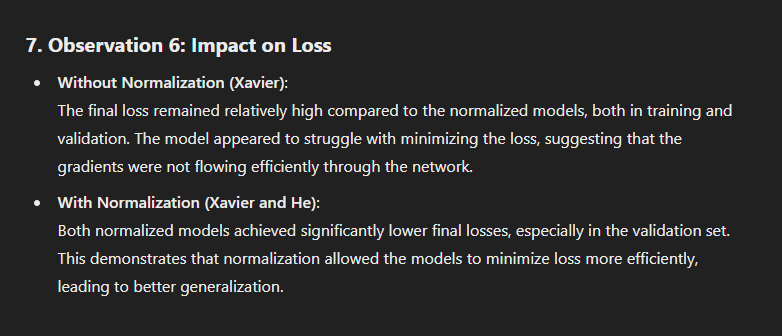

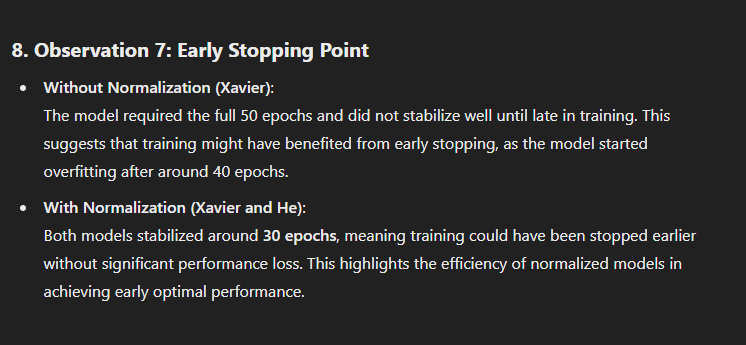

### **4. Reduces Sensitivity to Learning Rate**

- **Observation**: Normalized data reduces the model's sensitivity to the choice of the **learning rate**, making it easier to tune hyperparameters.
- **Explanation**: When inputs are normalized, the optimization landscape becomes smoother and less prone to sharp changes. As a result, the model can perform well across a wider range of learning rates, reducing the need for careful tuning and making training more robust.




### **5. Helps Avoid Overfitting in Small Datasets**

- **Observation**: Normalization can help reduce **overfitting**, especially in smaller datasets, by ensuring that all features contribute equally to the learning process.
- **Explanation**: Overfitting often occurs when the model learns to memorize specific patterns in the data. By normalizing input features, the model is forced to focus on general patterns that apply across the entire dataset, rather than being biased toward features with larger magnitudes.

`


### **6. Enhances Generalization to Unseen Data**

- **Observation**: Models trained with normalized data tend to **generalize better** to new, unseen data compared to those trained with unnormalized data.
- **Explanation**: Normalization ensures that the model does not become biased toward certain features due to their scale. This leads to better generalization performance, as the model learns to treat all input features with equal importance and learns more robust, general patterns.


### **7. Makes Batch Normalization More Effective**

- **Observation**: Normalizing the input data enhances the performance of **Batch Normalization**, as it provides more consistent feature distributions across the network.
- **Explanation**: Batch normalization normalizes layer outputs during training, but if the input data is unnormalized, the initial inputs to the network may still vary widely. Normalizing the input data makes the job of batch normalization easier, leading to more stable training and improved performance.


### **8. Impacts the Effectiveness of Regularization Techniques**

- **Observation**: Normalization can improve the effectiveness of regularization techniques like **dropout** and **L2 regularization**.
- **Explanation**: When input data is normalized, the network is less likely to rely on specific features with larger scales, making regularization techniques more effective. For example, dropout becomes more impactful, as neurons aren't overfitting to large-scale features, and L2 regularization more effectively penalizes large weights across all features.


### **9. Reduces the Likelihood of Saturating Activation Functions**

- **Observation**: Normalized data helps avoid the saturation of activation functions like **Sigmoid** and **Tanh**, where the outputs become near-zero or near-one, leading to poor gradient flow.
- **Explanation**: When input data has extreme values (e.g., very large or very small), the outputs of activation functions like Sigmoid or Tanh can saturate, leading to vanishing gradients during backpropagation. Normalizing input data helps keep activations in a more linear range, preventing saturation and ensuring better gradient flow.


### **10. Improves Transfer Learning Performance**

- **Observation**: Normalization is crucial for improving the performance of models in **transfer learning**, where pre-trained models are fine-tuned on new datasets.
- **Explanation**: When fine-tuning a pre-trained model on new data, the input distributions of the new dataset often differ from the original dataset. By normalizing the new data, the input distributions are aligned, which allows the pre-trained model to adapt more easily, leading to better fine-tuning performance.
